# Evaluate intermediate concept targets
Here we apply the rules of the rule model of the SB model on the intermediate targets and compare the obtained segmentation with the TLM labels

In [7]:
%matplotlib inline
import sys
import os
from utils.viz_utils import TASK_NAMES

project_dir = os.path.dirname(os.path.dirname(os.getcwd()))
sys.path.append(project_dir)
import torch

from utils.viz_utils import *

In [10]:
class_names = (['NF', 'OF', 'CF', 'SF'], ['NF', 'F'], ['OF', 'CF', 'SF'])

def display_results(metrics_fn):
    d = torch.load(metrics_fn)
    cms = d['cms']
    reports = d['reports']
    for key, cn in zip(cms.keys(), class_names):
        try:
            print(TASK_NAMES[key])
        except KeyError:
            print(key)
        print('classes: {}'.format(cn))
        display_norm_cm(cms[key], class_names=cn)
        print_report(reports[key])

main
classes: ['NF', 'OF', 'CF', 'SF']
IoU NF: 0.896
IoU OF: 0.0937
IoU CF: 0.845
IoU SF: 0.315
mIoU: 0.537


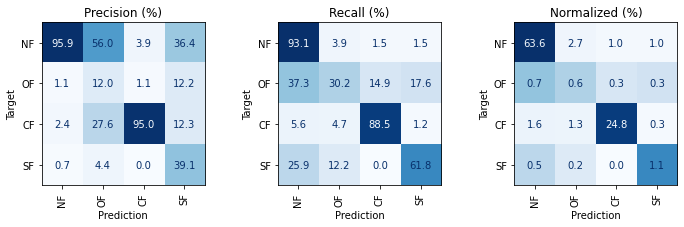

          accuracy precision    recall  f1-score support (%)   support

     NF       0.92      0.96      0.93      0.94     68.35 396119387

     OF       0.94      0.12      0.30      0.17      1.90  11024403

     CF       0.95      0.95      0.88      0.92     28.01 162319093

     SF       0.97      0.39      0.62      0.48      1.74  10089306

   mean       0.95      0.60      0.68      0.63    100.00 579552189

overall       0.93      0.93      0.90      0.91    100.00 579552189


pof
classes: ['NF', 'F']
IoU NF: 0.874
IoU F: 0.763
mIoU: 0.819


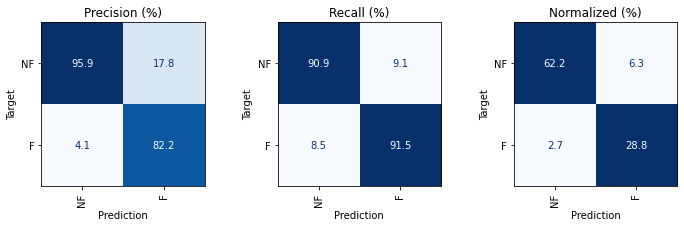

          accuracy precision    recall  f1-score support (%)   support

     NF       0.91      0.96      0.91      0.93     68.46 405964969

      F       0.91      0.82      0.91      0.87     31.54 187035031

   mean       0.91      0.89      0.91      0.90    100.00 593000000

overall       0.91      0.92      0.91      0.91    100.00 593000000


ft
classes: ['OF', 'CF', 'SF']
IoU OF: 0.207
IoU CF: 0.915
IoU SF: 0.459
mIoU: 0.527


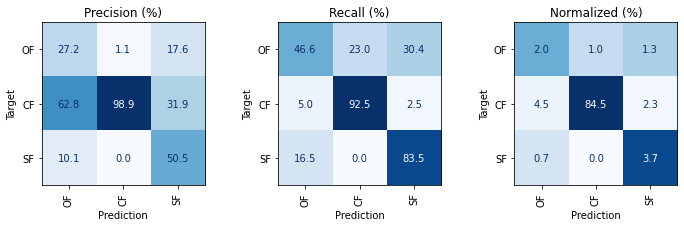

          accuracy precision    recall  f1-score support (%)   support

     OF       0.92      0.27      0.47      0.34      4.21   7142084

     CF       0.92      0.99      0.93      0.96     91.40 155216863

     SF       0.95      0.51      0.84      0.63      4.40   7471134

   mean       0.93      0.59      0.74      0.64    100.00 169830081

overall       0.92      0.94      0.90      0.92    100.00 169830081




In [11]:
metrics_fn = os.path.join(project_dir, 'output/rules_on_regr_labels_TH_TCD1/metrics.pt')
display_results(metrics_fn)